In [5]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
# to find the names of the images
import re 
# for copying the images to the target folder
import shutil
import numpy as np
import cv2 as cv
import imghdr

In [2]:
flowers = ['tulip', 'orchids', 'peonies', 'hydrangeas', 'lilies', 'gardenias', 'garden_roses', 'daisies' ,'hibiscus', 'bougainvillea']

# making folders for each flower category
for i in flowers:
    os.mkdir(i)

In [3]:

raw_data = "flowers"  

# Loop through all files in the raw_data directory
for i in os.listdir(raw_data):
    # Use regex to find the file name pattern
    match = re.findall(r'^[a-z]*_[a-z]*', i)  # Look for names like "rose_flower"
    
    if match:  # Check if there was a match
        file_name = match[0]  # Get the first match

        # Remove any trailing underscore if it exists
        if file_name.endswith("_"):
            file_name = file_name[:-1]

        # Construct the full path for the source file
        source = os.path.join(raw_data, i)

        # Construct the full path for the destination folder
        destination_folder = os.path.join(os.getcwd(), file_name)  # Uses the current working directory

        # Ensure the destination folder exists
        if not os.path.exists(destination_folder):
            os.makedirs(destination_folder)

        # Construct the full path for the destination file
        destination_file = os.path.join(destination_folder, i)

        # Move the file
        shutil.move(source, destination_file)

In [4]:
for i in flowers:
    print(os.listdir(f"{i}")[:10])

['tulip_00002.jpg', 'tulip_00003.jpg', 'tulip_00004.jpg', 'tulip_00005.jpg', 'tulip_00006.jpg', 'tulip_00007.jpg', 'tulip_00008.jpg', 'tulip_00009.jpg', 'tulip_00010.jpg', 'tulip_00011.jpg']
['orchids_00002.jpg', 'orchids_00003.jpg', 'orchids_00004.jpg', 'orchids_00005.jpg', 'orchids_00006.jpg', 'orchids_00007.jpg', 'orchids_00008.jpg', 'orchids_00009.jpg', 'orchids_00010.jpg', 'orchids_00011.jpg']
['peonies_00002.jpg', 'peonies_00003.jpg', 'peonies_00004.jpg', 'peonies_00005.jpg', 'peonies_00006.jpg', 'peonies_00008.jpg', 'peonies_00009.jpg', 'peonies_00010.jpg', 'peonies_00011.jpg', 'peonies_00012.jpg']
['hydrangeas_00002.jpg', 'hydrangeas_00003.jpg', 'hydrangeas_00004.jpg', 'hydrangeas_00005.jpg', 'hydrangeas_00006.jpg', 'hydrangeas_00007.jpg', 'hydrangeas_00008.jpg', 'hydrangeas_00009.jpg', 'hydrangeas_00010.jpg', 'hydrangeas_00012.jpg']
['lilies_00002.jpg', 'lilies_00003.jpg', 'lilies_00004.jpg', 'lilies_00005.jpg', 'lilies_00006.jpg', 'lilies_00007.jpg', 'lilies_00008.jpg', 'lili

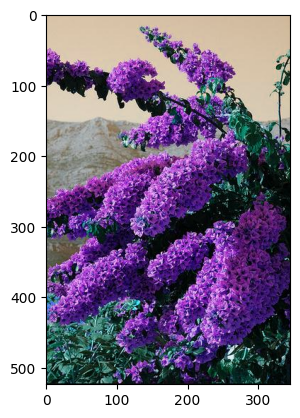

In [7]:
img = cv.imread("bougainvillea/bougainvillea_00059.jpg")
plt.imshow(img)
plt.show()

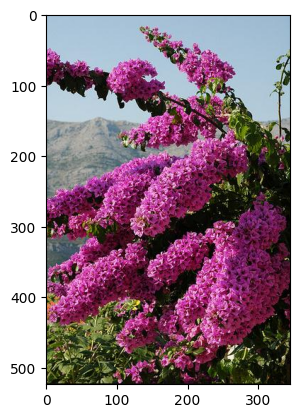

In [8]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [13]:
data = tf.keras.utils.image_dataset_from_directory('flowers')

Found 733 files belonging to 10 classes.


In [15]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [16]:
labels = data.class_names
labels

['bougainvillea',
 'daisies',
 'garden_roses',
 'gardenias',
 'hibiscus',
 'hydrangeas',
 'lilies',
 'orchids',
 'peonies',
 'tulip']

In [17]:
# labels
batch[1]

array([9, 3, 1, 1, 8, 1, 0, 5, 7, 4, 5, 7, 4, 5, 4, 6, 9, 7, 8, 2, 1, 1,
       8, 5, 4, 4, 9, 1, 5, 8, 6, 5])

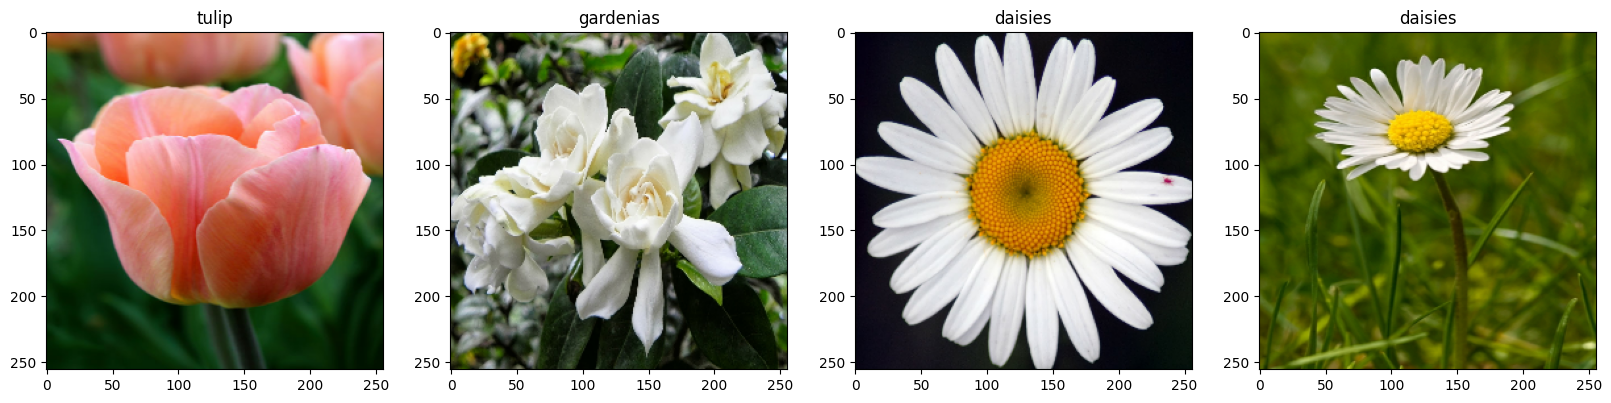

In [18]:
# Visualization
fig, ax = plt.subplots(ncols= 4, figsize= (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(labels[batch[1][idx]])

In [19]:
# Scaling the images
data = data.map(lambda x,y : (x/255, y))

In [20]:
batch = data.as_numpy_iterator().next()

In [21]:
print(batch[0].min(), batch[0].max())

0.0 1.0


In [22]:
print(f"Data is split into {len(data)} batches and Each batch has {len(batch[0])} images.")


Data is split into 23 batches and Each batch has 32 images.


In [23]:
train_size = int(len(data)* .7)
val_size = int(len(data)* .2) + 1
test_size = int(len(data)* .1) 

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [25]:
print(train)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [28]:

# Define the model
model = Sequential()

# Add layers to the model
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=11, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss=tf.losses.SparseCategoricalCrossentropy(),  # Note the use of the function call
              metrics=['accuracy'])

# Summary of the model
model.summary()

c:\Users\samma\anaconda3\envs\env1\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,699,195 (14.11 MB)

 Trainable params: 3,699,195 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [30]:
hist = model.fit(train, epochs= 20, validation_data= val, callbacks= [tensorboard_callback])

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 908ms/step - accuracy: 0.1326 - loss: 2.6555 - val_accuracy: 0.3063 - val_loss: 2.1133
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 638ms/step - accuracy: 0.2904 - loss: 1.9851 - val_accuracy: 0.4062 - val_loss: 1.8512
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 556ms/step - accuracy: 0.4302 - loss: 1.7054 - val_accuracy: 0.6438 - val_loss: 1.3645
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 682ms/step - accuracy: 0.5588 - loss: 1.2347 - val_accuracy: 0.6812 - val_loss: 1.0617
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 591ms/step - accuracy: 0.7337 - loss: 0.8893 - val_accuracy: 0.6562 - val_loss: 1.0447
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 545ms/step - accuracy: 0.8005 - loss: 0.6695 - val_accuracy: 0.7500 - val_loss: 0.7934
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 581ms/step - accuracy: 0.8983 - loss: 0.4402 - val_accuracy: 0.8687 - val_loss: 0.4935
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 576ms/step - accuracy: 0.9048 - loss: 0.3065 - val_accuracy

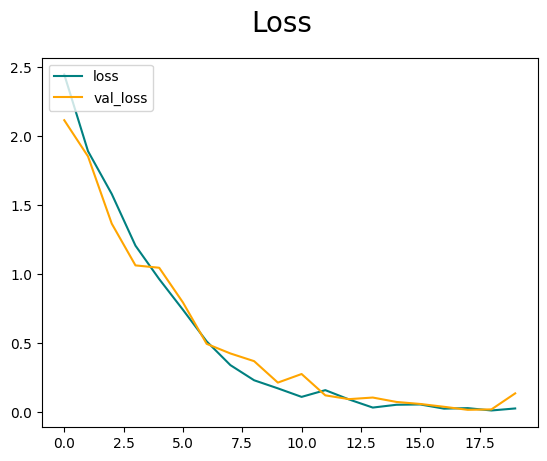

In [58]:
# Plotting Model Loss Performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

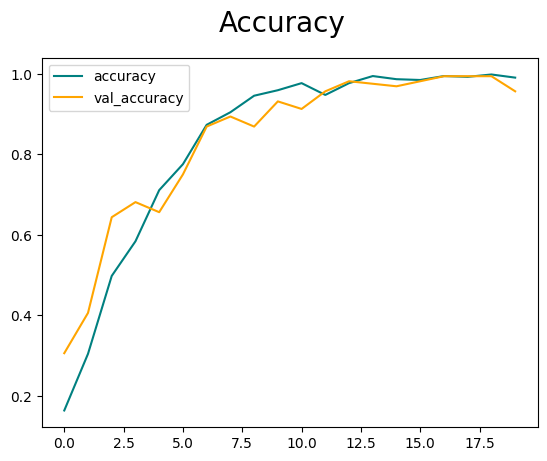

In [59]:
# Plotting Model Accuracy Performance
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [53]:
import pyswarms as ps

In [54]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)
# Perform optimization
best_cost, best_pos = optimizer.optimize(fx.sphere, iters=100)

2024-11-02 14:55:30,560 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=5.09e-8
2024-11-02 14:55:30,842 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.090221872804255e-08, best pos: [ 2.24507321e-04 -2.23311767e-05]


In [55]:
# Obtain the cost history
optimizer.cost_history
# Obtain the position history
optimizer.pos_history
# Obtain the velocity history
optimizer.velocity_history

[array([[0.9905154 , 0.04952833],
        [0.01562529, 0.44447793],
        [0.85073159, 0.51418959],
        [0.82261994, 0.81268117],
        [0.34692835, 0.65272988],
        [0.85595019, 0.99479475],
        [0.31510069, 0.21033584],
        [0.62180854, 0.80371366],
        [0.61667738, 0.61140047],
        [0.77677233, 0.75272679]]),
 array([[0.86293656, 0.02071907],
        [0.02891291, 0.32557677],
        [0.73231034, 0.39645762],
        [0.72321495, 0.67342753],
        [0.31223551, 0.58745689],
        [0.69175746, 0.74143413],
        [0.2976949 , 0.17136293],
        [0.62052281, 0.60590624],
        [0.59418269, 0.50977672],
        [0.69809231, 0.6825567 ]]),
 array([[0.39934036, 0.01781672],
        [0.05936345, 0.03267804],
        [0.050738  , 0.09567653],
        [0.40971065, 0.4473717 ],
        [0.12263393, 0.25335522],
        [0.44033012, 0.06238244],
        [0.11895058, 0.09146713],
        [0.19058944, 0.10422516],
        [0.47923392, 0.13137299],
        [0

In [56]:
optimizer.mean_pbest_history

[0.7131539167418612,
 0.7131539167418612,
 0.7131539167418612,
 0.7131539167418612,
 0.6610508566641651,
 0.34512102286592516,
 0.21552942386536178,
 0.20676660801406696,
 0.20301698366959336,
 0.1821988699708766,
 0.12973353351597286,
 0.11906767312526123,
 0.10679396785443855,
 0.10111597096991647,
 0.08121533730009259,
 0.05761371834331952,
 0.04890706702085783,
 0.04890706702085783,
 0.04571975118658265,
 0.04571975118658265,
 0.02604691998048262,
 0.025795192721381883,
 0.025795192721381883,
 0.01641704867129744,
 0.016081307525105486,
 0.01219540791399283,
 0.012188410473752808,
 0.011588848868344078,
 0.006392493094374702,
 0.00623289376598467,
 0.004233010884885317,
 0.004139522412238227,
 0.004139522412238227,
 0.0027863069352874795,
 0.002477115742835799,
 0.002039919149581916,
 0.002039919149581916,
 0.002039919149581916,
 0.0016733433370528517,
 0.0016733433370528517,
 0.0006582087964732682,
 0.000646987134895884,
 0.000646987134895884,
 0.000646987134895884,
 0.00064698713

In [57]:
from pyswarms.utils.search import RandomSearch
from pyswarms.utils.functions import single_obj as fx

# Set-up choices for the parameters
options = {
    'c1': (1,5),
    'c2': (6,10),
    'w': (2,5),
    'k': (11, 15),
    'p': 1
}

# Create a RandomSearch object
# n_selection_iters is the number of iterations to run the searcher
# iters is the number of iterations to run the optimizer
g = RandomSearch(ps.single.LocalBestPSO, n_particles=40,
            dimensions=20, options=options, objective_func=fx.sphere,
            iters=10, n_selection_iters=100)

best_score, best_options = g.search()


2024-11-02 14:56:10,213 - pyswarms.single.local_best - INFO - Optimize for 10 iters with {'c1': 4.765379775838627, 'c2': 8.852342214874376, 'w': 2.947848812153738, 'k': 12, 'p': 1}
pyswarms.single.local_best: 100%|██████████|10/10, best_cost=4.19
2024-11-02 14:56:10,247 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 4.192472145967878, best pos: [0.15859995 0.12197475 0.37073502 0.58764869 0.74522304 0.65510854
 0.75025231 0.19327239 0.01429326 0.33905629 0.57297881 0.09051821
 0.70412382 0.398146   0.90406475 0.18428193 0.22397326 0.12933943
 0.06073385 0.23887458]
2024-11-02 14:56:10,261 - pyswarms.single.local_best - INFO - Optimize for 10 iters with {'c1': 1.7377327800516946, 'c2': 7.088568420779255, 'w': 2.768136344762381, 'k': 12, 'p': 1}
pyswarms.single.local_best: 100%|██████████|10/10, best_cost=3.98
2024-11-02 14:56:10,294 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 3.9806397216046396, best pos: [0.37037372 0.44371643 0.02

In [60]:
from tensorflow.keras.metrics import CategoricalAccuracy

In [61]:
acc = CategoricalAccuracy()

In [62]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    yhat = [i.argmax() for i in yhat]
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [63]:
print(f'Accuracy: {round(acc.result().numpy() * 100, 2)} %')

Accuracy: 100.0 %


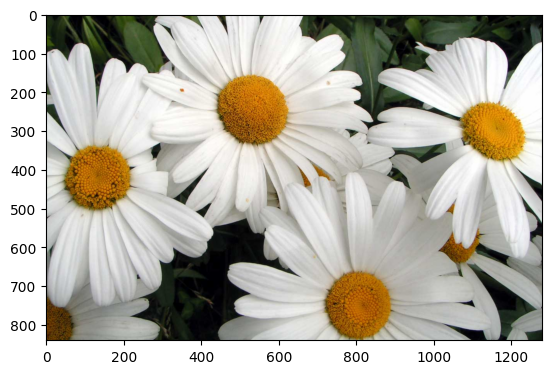

In [64]:
img = cv.imread('flowers/daisies/daisies_00008.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

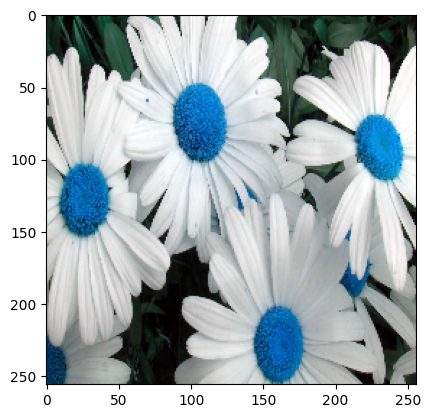

In [40]:
# Resizing the test image
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [65]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [66]:
labels[yhat.argmax()]

'daisies'

In [67]:
# Wrapping up in a function
def predict_flower(model, img_path):
    img = cv.imread(img_path)
    resize = tf.image.resize(img, (256, 256))
    yhat = model.predict(np.expand_dims(resize/255,0))
    return f'{labels[yhat.argmax()]}'

In [68]:
predict_flower(model, 'test/test1.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


'daisies'

In [72]:
predict_flower(model, 'test/test3.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


'gardenias'

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step


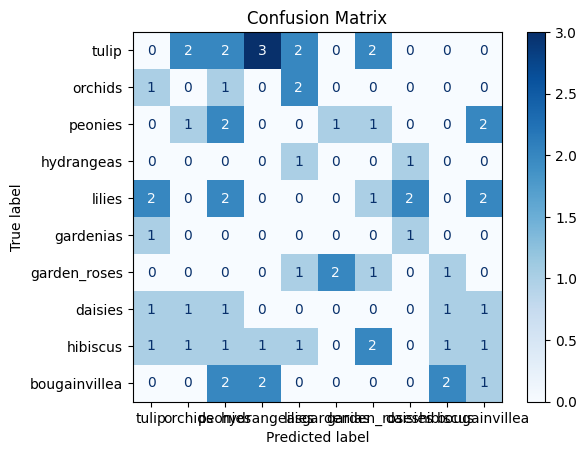

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming `test` is your test dataset and it is in the same format as your train/val datasets.
# You may need to adjust this based on how your test set is structured.

# Get true labels from the test dataset
true_labels = []
for _, label in test.unbatch():
    true_labels.append(label.numpy())
true_labels = np.array(true_labels)

# Make predictions
predictions = model.predict(test)
predicted_labels = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=flowers)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()